<a href="https://colab.research.google.com/github/nedokormysh/OpenEdu_HSE_INTRML/blob/week1/%D0%9D%D0%B5%D0%B4%D0%B5%D0%BB%D1%8F1_pandas_correct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# скачиваем файл
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1cq9JDz8-zwzoGL6udiT_ogHHRWdnsd1q' -O math_students.csv

--2023-01-27 13:21:43--  https://docs.google.com/uc?export=download&id=1cq9JDz8-zwzoGL6udiT_ogHHRWdnsd1q
Resolving docs.google.com (docs.google.com)... 108.177.11.101, 108.177.11.138, 108.177.11.102, ...
Connecting to docs.google.com (docs.google.com)|108.177.11.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-5k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1meq0csla0cltnrbdpqlbif7mv69fps7/1674825675000/07828702499945486090/*/1cq9JDz8-zwzoGL6udiT_ogHHRWdnsd1q?e=download&uuid=07662389-1e8d-43ae-be91-7ad7df358b25 [following]
--2023-01-27 13:21:43--  https://doc-0g-5k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1meq0csla0cltnrbdpqlbif7mv69fps7/1674825675000/07828702499945486090/*/1cq9JDz8-zwzoGL6udiT_ogHHRWdnsd1q?e=download&uuid=07662389-1e8d-43ae-be91-7ad7df358b25
Resolving doc-0g-5k-docs.googleusercontent.com (doc-0g-5k-docs.googleusercontent.com)... 173.194.210.132, 2607:f8b0

In [2]:
import pandas as pd
data = pd.read_csv('math_students.csv', delimiter=',')

1. Какая причина выбора школы была самой частой? В качестве ответа приведите соответствующее значение признака.

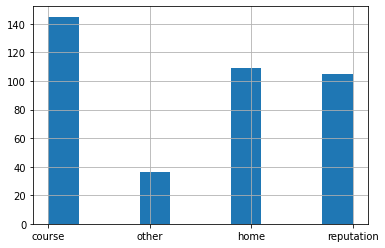

In [3]:
data['reason'].hist()

In [6]:
data['reason'].value_counts()

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

2. Найдите количество студентов, у родителей которых нет никакого образования.

Верным ответом является - 0

In [44]:
data[(data['Medu'] == 0) & (data['Fedu'] == 0)].shape[0]

0

In [12]:
data[(data['Medu'] == 0) | (data['Fedu'] == 0)].shape[0]

5

3. Найдите минимальный возраст учащегося школы Mousinho da Silveira.

In [15]:
data[data['school'] == 'MS'].age.min()

17

4. Найдите количество студентов, имеющих нечетное число пропусков.

In [18]:
data['absences']

0       6
1       4
2      10
3       2
4       4
       ..
390    11
391     3
392     3
393     0
394     5
Name: absences, Length: 395, dtype: int64

In [21]:
data[data['absences'] % 2 != 0].shape[0]

41

5. Найдите разность между средними итоговыми оценками студентов, состоящих и не состоящих в романтических отношениях. В качестве ответа приведите число, округленное до двух значащих цифр после запятой.

In [23]:
data_r = data.groupby('romantic')

In [45]:
data_r['G3'].mean()

romantic
no     10.836502
yes     9.575758
Name: G3, dtype: float64

In [47]:
round(data_r['G3'].mean()[1] - data_r['G3'].mean()[0], 2)

-1.26

6. Сколько занятий пропустило большинство студентов с самым частым значением наличия внеклассных активностей?

*Примечание. В данном контексте под "большинством" подразумеваются студенты, имеющее самое частое значение пропусков. То есть в данном задании необходимо:*


* *Определить самое частое значение наличия внеклассных активностей (да или нет).*
* *Для группы студентов, соответствующей этому значению, рассмотреть значения признака «число пропусков».*
* *Для каждого значения числа пропусков посчитать, сколько студентов ему соответствует.*
* *Выбрать значение числа пропусков с наибольшим числом студентов.*



In [29]:
data['activities'].value_counts()

yes    201
no     194
Name: activities, dtype: int64

In [38]:
data_act_yes = data[data['activities'] == 'yes']

In [51]:
data_act_yes['absences'].max()

56

In [63]:
data_act_yes.head(50)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15
11,GP,F,15,U,GT3,T,2,1,services,other,...,5,2,2,1,1,4,4,10,12,12
12,GP,M,15,U,LE3,T,4,4,health,services,...,4,3,3,1,3,5,2,14,14,14
16,GP,F,16,U,GT3,T,4,4,services,services,...,3,2,3,1,2,2,6,13,14,14
17,GP,F,16,U,GT3,T,3,3,other,other,...,5,3,2,1,1,4,4,8,10,10
18,GP,M,17,U,GT3,T,3,2,services,services,...,5,5,5,2,4,5,16,6,5,5
19,GP,M,16,U,LE3,T,4,3,health,other,...,3,1,3,1,3,5,4,8,10,10
22,GP,M,16,U,LE3,T,4,2,teacher,other,...,4,5,1,1,3,5,2,15,15,16


Посчитаем количество студентов для разного количества пропусков.

In [75]:
data_act_yes.groupby('absences')['G3'].count()

absences
0     51
1      2
2     37
3      4
4     29
5      1
6     17
7      3
8     16
9      2
10     9
11     2
12     3
13     1
14     7
15     3
16     4
17     1
18     2
20     2
22     1
25     1
30     1
54     1
56     1
Name: G3, dtype: int64

In [70]:
data_act_yes.groupby('absences').count().max()

school        51
sex           51
age           51
address       51
famsize       51
Pstatus       51
Medu          51
Fedu          51
Mjob          51
Fjob          51
reason        51
guardian      51
traveltime    51
studytime     51
failures      51
schoolsup     51
famsup        51
paid          51
activities    51
nursery       51
higher        51
internet      51
romantic      51
famrel        51
freetime      51
goout         51
Dalc          51
Walc          51
health        51
G1            51
G2            51
G3            51
dtype: int64

Верным ответом является - 0.

In [52]:
# data_act_yes.describe()

In [56]:
data_act_yes

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15
11,GP,F,15,U,GT3,T,2,1,services,other,...,5,2,2,1,1,4,4,10,12,12
12,GP,M,15,U,LE3,T,4,4,health,services,...,4,3,3,1,3,5,2,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,MS,M,18,R,GT3,T,2,1,other,other,...,4,4,3,1,3,5,5,7,6,7
382,MS,M,17,U,GT3,T,2,3,other,services,...,4,4,3,1,1,3,2,11,11,10
386,MS,F,18,R,GT3,T,4,4,teacher,at_home,...,4,4,3,2,2,5,7,6,5,6
387,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,0,7,5,0


In [64]:
data['activities'].value_counts()

yes    201
no     194
Name: activities, dtype: int64

In [65]:
active_stud = data[data['activities'] == 'yes']

In [66]:
active_stud['absences'].value_counts()

0     51
2     37
4     29
6     17
8     16
10     9
14     7
16     4
3      4
15     3
7      3
12     3
11     2
9      2
1      2
20     2
18     2
56     1
13     1
22     1
30     1
54     1
25     1
17     1
5      1
Name: absences, dtype: int64